<a href="https://colab.research.google.com/github/Santacaterina/data_analysis_project/blob/main/banco_bancos/bancos_bancos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder = '/content/drive/MyDrive/Colab Notebooks/kaggle/bancos-bancos'
files = os.listdir(folder)
print(files)

['dataset_banco-dataset_banco.csv', 'dataset_banco_cleaned.csv', 'bancos-bancos.ipynb']


In [4]:
file_name = 'dataset_banco-dataset_banco.csv'
file_path = os.path.join(folder, file_name)
df_full = pd.read_csv(file_path)
df_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [5]:
print(df_full.shape)

(45215, 17)


In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [7]:
df_full.dropna(inplace=True)

In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


Eliminacion de las columnas irrelevantes

---



In [9]:
df_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


tomando encuenta las columnas numericas, se puede ver que std no tiene valores iguales a 0, en este caso no se elimina ninguna columna de este tipo

In [10]:
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

In [11]:
#EBuscamos el numero de valores distintos o unicos en cada columna
for col in cols_cat:
  print(f'Column \033[1m{col}\033[0m: {df_full[col].nunique()} sublevels')

Column job: 18 sublevels
Column marital: 6 sublevels
Column education: 10 sublevels
Column default: 2 sublevels
Column housing: 2 sublevels
Column loan: 6 sublevels
Column contact: 5 sublevels
Column month: 12 sublevels
Column poutcome: 6 sublevels
Column y: 2 sublevels


En las columnas categoricas se observan que todas tienen mas de un subnivel, asi que no se elimnia ninguna

Verificacion de valores repetidos

---



In [12]:
df_full.drop_duplicates(inplace=True)
df_full.shape

(45203, 17)

Deteccion de valores outliers

---



In [13]:
cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

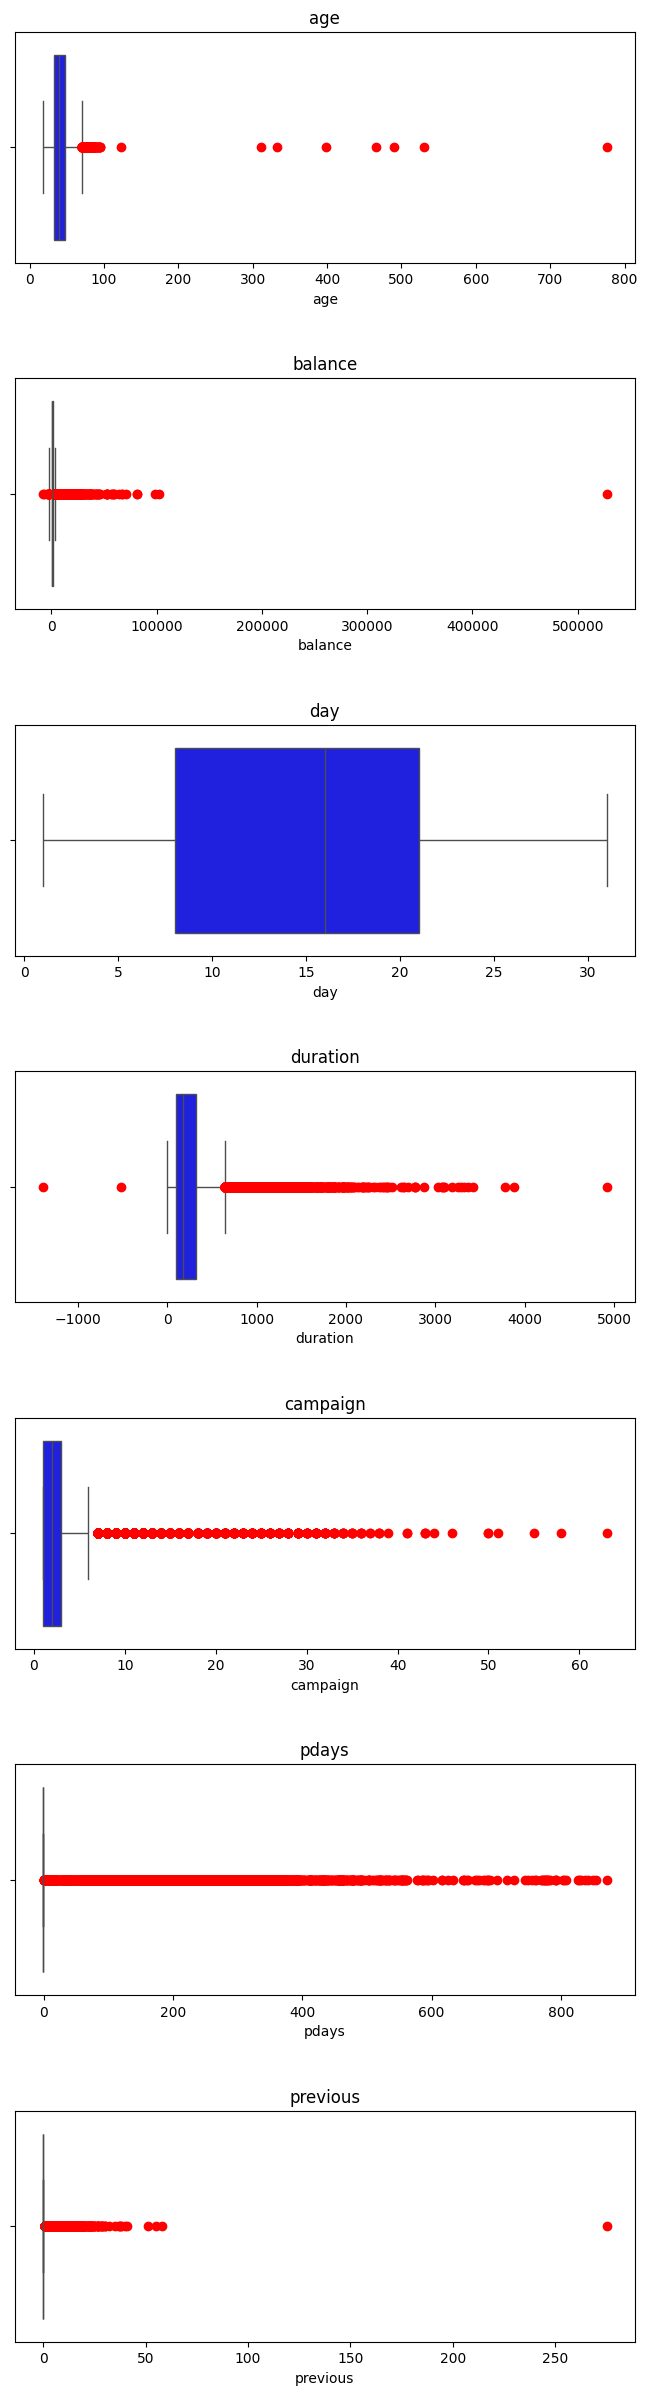

In [14]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

# Definir flierprops para los outliers
red_outliers = dict(markerfacecolor='red', marker='o', markeredgecolor='red')

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=df_full, ax=ax[i], color='blue', flierprops=red_outliers)
  ax[i].set_title(col)
plt.show()

In [15]:
print(f'tamaño previo a la eliminancion de valores outliers: \033[1m{df_full.shape}\033[0m')
df_full = df_full[(df_full['age'] >= 18) & (df_full['age'] <= 100)]
print(f'tamaño despues de la eliminancion de valores outliers: \033[1m{df_full.shape}\033[0m')

tamaño previo a la eliminancion de valores outliers: (45203, 17)
tamaño despues de la eliminancion de valores outliers: (45195, 17)


In [16]:
print(f'tamaño previo a la eliminancion de valores outliers: \033[1m{df_full.shape}\033[0m')
df_full = df_full[df_full['duration'] > 0]
print(f'tamaño despues de la eliminancion de valores outliers: \033[1m{df_full.shape}\033[0m')

tamaño previo a la eliminancion de valores outliers: (45195, 17)
tamaño despues de la eliminancion de valores outliers: (45190, 17)


In [17]:
print(f'tamaño previo a la eliminancion de valores outliers: \033[1m{df_full.shape}\033[0m')
df_full = df_full[df_full['previous'] <=100]
print(f'tamaño despues de la eliminancion de valores outliers: \033[1m{df_full.shape}\033[0m')

tamaño previo a la eliminancion de valores outliers: (45190, 17)
tamaño despues de la eliminancion de valores outliers: (45189, 17)


Correciones de errores tipograficos

---



In [18]:
for col in cols_cat:
  print(f'\033[1m{col}\033[0m')
  print(df_full[col].value_counts().to_string(header=False))
  print('-'*25)

job
blue-collar       9727
management        9451
technician        7592
admin.            5165
services          4151
retired           2262
self-employed     1577
entrepreneur      1486
unemployed        1303
housemaid         1240
student            937
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
-------------------------
marital
married     27200
single      12781
divorced     5194
div.            7
Single          4
DIVORCED        3
-------------------------
education
secondary    23181
tertiary     13297
primary       6845
unknown       1855
SECONDARY        3
Primary          2
UNK              2
sec.             2
Secondary        1
Tertiary         1
-------------------------
default
no     44374
yes      815
-------------------------
housing
yes    25111
no     20078
-------------------------
loan
no     37941
yes     7238
No         5
YES        2
NO         

En primer lugar podemos observar que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula (por ejemplo en la variable «job» donde tenemos «self-employed» y «Self-employed» o «management» y «MANAGEMENT»).

In [19]:
#para unificar el texto en minuscula las columnas categoricas
for column in df_full.columns:
  if column in cols_cat:
    df_full[column] = df_full[column].str.lower()

Ahora analicemos cada variable de manera individual para verificar otras posibles inconsistencias:

-job: se tienen equivalencias entre "admin." y "administrative"

-marital: se tienen equivalencias entre "divorced" y "div."

-education: se tienen equivalencias entre "secondary" y "sec." y entre "unknown" y "unk."

-contact: se tienen equivalencias entre "cellular" y "mobile" y entre "telephone" y "phone"

In [20]:
df_full['job'] = df_full['job'].str.replace('admin.', 'administrative', regex=False)
df_full['marital'] = df_full['marital'].str.replace('div.', 'divorced', regex=False)
df_full['education'] = df_full['education'].str.replace('sec.', 'secondary', regex=False)
df_full['education'] = df_full['education'].replace({'unk': 'unknown'})
df_full['contact'] = df_full['contact'].str.replace('mobile', 'cellular', regex=False)
df_full['contact'] = df_full['contact'].replace({'phone': 'telephone'})
df_full['poutcome'] = df_full['poutcome'].replace({'unk': 'unknown'})

In [21]:
#Para verificar todo
for col in cols_cat:
  print(f'\033[1m{col}\033[0m')
  print(df_full[col].value_counts().to_string(header=False))
  print('-'*25)

job
blue-collar       9727
management        9455
technician        7592
administrative    5168
services          4152
retired           2263
self-employed     1578
entrepreneur      1486
unemployed        1303
housemaid         1240
student            937
unknown            288
-------------------------
marital
married     27200
single      12785
divorced     5204
-------------------------
education
secondary    23187
tertiary     13298
primary       6847
unknown       1857
-------------------------
default
no     44374
yes      815
-------------------------
housing
yes    25111
no     20078
-------------------------
loan
no     37948
yes     7241
-------------------------
contact
cellular     29274
unknown      13011
telephone     2904
-------------------------
month
may    13748
jul     6895
aug     6246
jun     5341
nov     3970
apr     2931
feb     2648
jan     1402
oct      738
sep      579
mar      477
dec      214
-------------------------
poutcome
unknown    36943
failure     

In [22]:
# Definir la ruta para guardar el archivo en Google Drive
output_folder = '/content/drive/MyDrive/Colab Notebooks/kaggle/bancos-bancos'
output_file_name = 'dataset_banco_cleaned.csv'
output_file_path = os.path.join(output_folder, output_file_name)

df_full.to_csv(output_file_path, index=False)